In [ ]:
# imports

import pandas as pd
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)

import numpy as np
#import gc

#import catboost ## thanks to yandex ! :) 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#from tqdm import tqdm_notebook

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# info about itertools.product: 
# https://pythonworld.ru/moduli/modul-itertools.html
# https://docs.python.org/2/library/itertools.html
from itertools import product

In [4]:
eff_train = pd.read_csv('data/eff_train/eff_train1.csv', sep=';')
for x in range(2,11):
    eff_train_new = pd.read_csv('data/eff_train/eff_train{}.csv'.format(x), sep=';')
    eff_train = pd.concat([eff_train, eff_train_new])
eff_train = eff_train.rename(columns = {' timestamp':'timestamp', ' value':'value', ' quality':'quality'})
eff_train['date']=eff_train['timestamp'].str.split(' ').str.get(0)
eff_train['time']=eff_train['timestamp'].str.split(' ').str.get(1)
eff_train = eff_train.drop("timestamp", 1)
eff_train.head()

,tag,value,quality,date,time
0,Efficiency,16137.70,Good,01.10.2016,0:00
1,Efficiency,16060.55,Good,01.10.2016,0:00
2,Efficiency,16633.79,Good,01.10.2016,0:00
3,Efficiency,17578.13,Good,01.10.2016,0:00
4,Efficiency,17331.05,Good,01.10.2016,0:00


In [5]:
eff_test1 = pd.read_csv('data/eff_test/eff_test1.csv', sep=';')
eff_test2 = pd.read_csv('data/eff_test/eff_test2.csv', sep=';')
eff_test = pd.concat([eff_test1, eff_test2])
eff_test = eff_test.rename(columns = {' timestamp':'timestamp', ' value':'value', ' quality':'quality'})
eff_test['date']=eff_test['timestamp'].str.split(' ').str.get(0)
eff_test['time']=eff_test['timestamp'].str.split(' ').str.get(1)
eff_test = eff_test.drop("timestamp", 1)
eff_test.head()

,tag,value,quality,date,time
0,Efficiency,16836.91,Good,01.08.2017,0:00
1,Efficiency,17145.51,Good,01.08.2017,0:00
2,Efficiency,17329.10,Good,01.08.2017,0:00
3,Efficiency,17136.72,Good,01.08.2017,0:00
4,Efficiency,17081.05,Good,01.08.2017,0:00


In [6]:
energy_train = pd.read_csv('data/energy_cons_train/Energy_cons_train1.csv', sep=';')
for x in range(2,11):
    energy_train_new = pd.read_csv('data/energy_cons_train/Energy_cons_train{}.csv'.format(x), sep=';')
    energy_train = pd.concat([energy_train, energy_train_new])
energy_train = energy_train.rename(columns = { ' timestamp':'timestamp', ' value':'value', ' quality':'quality'})
energy_train['date']=energy_train['timestamp'].str.split(' ').str.get(0)
energy_train['time']=energy_train['timestamp'].str.split(' ').str.get(1)
energy_train = energy_train.drop("timestamp", 1)
energy_train.head()

,tag,value,quality,date,time
0,Energy_cons,20.347508,Good,01.10.2016,0:01
1,Energy_cons,20.24238,Good,01.10.2016,0:02
2,Energy_cons,20.208391,Good,01.10.2016,0:03
3,Energy_cons,20.239189,Good,01.10.2016,0:04
4,Energy_cons,20.262808,Good,01.10.2016,0:05


In [7]:
energy_test = pd.read_csv('data/energy_cons_test/Energy_cons_test1.csv', sep=';')
x=2
energy_test_new = pd.read_csv('data/energy_cons_test/Energy_cons_test{}.csv'.format(x), sep=';')
energy_test = pd.concat([energy_test, energy_test_new])
energy_test = energy_test.rename(columns = { ' timestamp':'timestamp', ' value':'value', ' quality':'quality'})
energy_test['date']=energy_test['timestamp'].str.split(' ').str.get(0)
energy_test['time']=energy_test['timestamp'].str.split(' ').str.get(1)
energy_test = energy_test.drop("timestamp", 1)
energy_test.head()

,tag,value,quality,date,time
0,Energy_cons,17.324733,Good,01.08.2017,0:01
1,Energy_cons,17.46305,Good,01.08.2017,0:02
2,Energy_cons,17.292918,Good,01.08.2017,0:03
3,Energy_cons,17.103727,Good,01.08.2017,0:04
4,Energy_cons,17.15151,Good,01.08.2017,0:05


In [34]:
#g = sns.pairplot(energy_test, size = 2, vars=["value", "date"])

In [8]:
qual_train = pd.read_csv('data/qual_train/qual_train1.csv', sep=';') 
for x in range(2,11): 
    qual_train_new = pd.read_csv('data/qual_train/qual_train{}.csv'.format(x), sep=';') 
    qual_train = pd.concat([qual_train, qual_train_new]) 
qual_train = qual_train.rename(columns = { ' timestamp':'timestamp', ' value':'value', ' quality':'quality'}) 
qual_train['date']=qual_train['timestamp'].str.split(' ').str.get(0)
qual_train['time']=qual_train['timestamp'].str.split(' ').str.get(1)
qual_train = qual_train.drop("timestamp", 1)
qual_train.head()

,tag,value,quality,date,time
0,Quality,2.2,Good,01.10.2016,0:38
1,Quality,2.2,Good,01.10.2016,1:02
2,Quality,2.3,Good,01.10.2016,1:26
3,Quality,2.2,Good,01.10.2016,1:50
4,Quality,2.2,Good,01.10.2016,2:14


In [9]:
qual_test = pd.read_csv('data/qual_test/qual_test1.csv', sep=';') 
x=2 
qual_test_new = pd.read_csv('data/qual_test/qual_test{}.csv'.format(x), sep=';') 
qual_test = pd.concat([qual_test, qual_test_new]) 
qual_test = qual_test.rename(columns = { ' timestamp':'timestamp', ' value':'value', ' quality':'quality'}) 
qual_test['date']=qual_test['timestamp'].str.split(' ').str.get(0)
qual_test['time']=qual_test['timestamp'].str.split(' ').str.get(1)
qual_test = qual_test.drop("timestamp", 1)
qual_test.head()

,tag,value,quality,date,time
0,Quality,2.2,Good,01.08.2017,0:14
1,Quality,2.2,Good,01.08.2017,0:38
2,Quality,2.2,Good,01.08.2017,1:02
3,Quality,2.2,Good,01.08.2017,1:26
4,Quality,2.1,Good,01.08.2017,1:50


In [35]:
df_qual_train = pd.DataFrame(np.array([qual_train['date'] + ' ' + qual_train['time'], [qual_train['value']]]))
df_qual_train.head()
#qual_train['date'] + ' ' + qual_test['time']
#print(qual_test['date'] +' ' + qual_test['time'])

,0
0,0 01.10.2016 0:38 1 01.10.2016 1...
1,"[[2.2, 2.2, 2.3, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2,..."


In [53]:
df_date = np.array(energy_train['date'] + ' ' + energy_train['time'])
df_value = np.array(energy_train['value'].astype('float'))

df_date = pd.to_datetime(df_date)
ser = pd.Series(df_value, df_date)


ValueError: could not convert string to float: '01.09.4139'

In [52]:
ser[,:]

SyntaxError: invalid syntax (<ipython-input-52-cfcfe37baf41>, line 1)

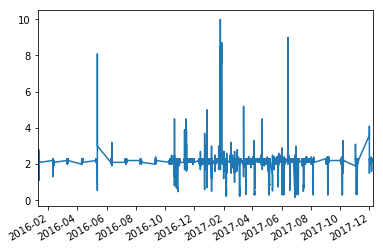

In [44]:
df_date = np.array(qual_train['date'] + ' ' + qual_train['time'])
df_value = np.array(qual_train['value'])

df_date = pd.to_datetime(df_date)
ser = pd.Series(df_value, df_date)
ser.plot()